## Linear Algebra Exercise

### What is a vector?

In [1]:
## example of using MFCC

In [1]:
import librosa
import numpy as np

# Load audio file
audio_file = 'plasma_0001.wav'
y, sr = librosa.load(audio_file)

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Normalize MFCCs
mfccs = (mfccs - np.mean(mfccs)) / np.std(mfccs)

# Convert MFCCs to matrix dataset
dataset = mfccs.T

print(dataset.shape)  # Output: (num_frames, num_mfcc)


(233, 13)


In [2]:
print(dataset)

[[-3.4833784  -0.12257376  0.662883   ...  0.44936702  0.2275377
   0.11726384]
 [-3.2961378  -0.26083034  0.5753643  ...  0.45772213  0.25429308
   0.1004549 ]
 [-3.328098   -0.31515455  0.554719   ...  0.4630662   0.29701853
   0.07514349]
 ...
 [-3.5247157   0.00909222  0.7343298  ...  0.39856607  0.51334
   0.18457381]
 [-5.693421   -0.04769729  0.7423167  ...  0.42019424  0.4751696
   0.2100416 ]
 [-7.334886    0.27590224  0.27590224 ...  0.27590224  0.27590224
   0.27590224]]


In [3]:
import numpy as np
import scipy.io.wavfile as wavfile

# Load audio file
audio_file = 'plasma_0001.wav'
sr, signal = wavfile.read(audio_file)

# Apply FFT
spectrum = np.fft.fft(signal)

# Calculate magnitudes of complex spectrum
magnitudes = np.abs(spectrum)

# Convert magnitudes to decibels (dB)
magnitudes_dB = 20 * np.log10(magnitudes)

# Normalize magnitudes to range [0, 1]
max_mag = np.max(magnitudes_dB)
magnitudes_norm = magnitudes_dB / max_mag

# Convert magnitudes to matrix dataset
dataset = magnitudes_norm.reshape(-1, 1)

print(dataset.shape)  # Output: (num_samples, 1)


(1036800, 1)


/var/folders/ns/7q3hd22d3zj3rbv059dzhp540000gn/T/ipykernel_41194/129565222.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, signal = wavfile.read(audio_file)


In [4]:
print(dataset[1:10,:])

[[0.83077991]
 [0.86633381]
 [0.88067977]
 [0.88043151]
 [0.91918163]
 [0.88611707]
 [0.93258626]
 [0.93064103]
 [0.93923763]]


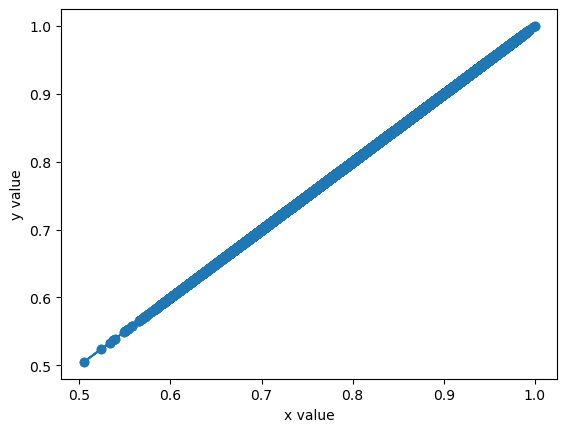

In [13]:
import matplotlib.pyplot as plt

plt.scatter(dataset, dataset)
plt.plot(dataset, dataset)

# Plot vector
#ax.quiver(0, 0, dataset, dataset, angles='xy', scale_units='xy', scale=1)

# Set plot limits
#ax.set_xlim([-1, 3])
#ax.set_ylim([-1, 3])

# Add labels and grid
plt.xlabel("x value")
plt.ylabel ("y value")

# Show plot
plt.show()

In [5]:
import librosa
import librosa.display

# Load audio file
audio_file = 'plasma_0001.wav'
audio, sr = librosa.load(audio_file)

# Compute STFT
stft = librosa.stft(audio)

# Compute magnitude spectrogram
mag_spec = librosa.amplitude_to_db(abs(stft))

# Compute frequency vector
freqs = librosa.core.fft_frequencies(n_fft=len(stft))

# Print the shape of the magnitude spectrogram and the frequency vector
print('Magnitude spectrogram shape:', mag_spec.shape)
print('Frequency vector shape:', freqs.shape)

ModuleNotFoundError: No module named 'librosa.display.waveplot'; 'librosa.display' is not a package

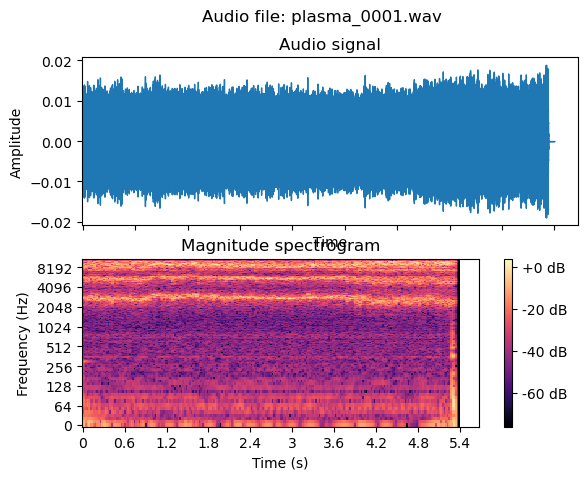

In [8]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load audio file
audio_file = 'plasma_0001.wav'
audio, sr = librosa.load(audio_file)

# Compute STFT
stft = librosa.stft(audio)

# Compute magnitude spectrogram
mag_spec = librosa.amplitude_to_db(abs(stft))

# Compute frequency vector
freqs = librosa.core.fft_frequencies(n_fft=len(stft))

# Create figure and subplots
fig, axs = plt.subplots(nrows=2, sharex=True)

# Plot audio signal in first subplot
librosa.display.waveshow(audio, sr=sr, ax=axs[0])

# Plot magnitude spectrogram in second subplot
img = librosa.display.specshow(mag_spec, x_axis='time', y_axis='log', ax=axs[1])
fig.colorbar(img, ax=axs[1], format='%+2.0f dB')

# Set title and axis labels
fig.suptitle('Audio file: {}'.format(audio_file))
axs[0].set(title='Audio signal', ylabel='Amplitude')

axs[1].set(title='Magnitude spectrogram', xlabel='Time (s)', ylabel='Frequency (Hz)')

# Show the plot
plt.show()


In [9]:
# Suppose lines is a list of strings
lines = ["This is the first line", "This is the second line"]

# Combine the lines into a single string
text = " ".join(lines)

# Split the text into words
words = text.split()

# Print the words
print(words)

['This', 'is', 'the', 'first', 'line', 'This', 'is', 'the', 'second', 'line']
